<a href="https://colab.research.google.com/github/cjayakody/Required-Assignment-5.1/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [ ]:
# Missing Values
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [ ]:
# Checking the % of missing values
data.isnull().mean()*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


3. Decide what to do about your missing data -- drop, replace, other...

The column "car" shows over 99% missing values.  Therefore, it was decided to remove the the data in the column "car" from the dataset. The other missing values related to columns "Bar",  "CoffeeHouse", "CarryAway", "RestaurentLessThan20" and "Restaurent20To50" were less than 2% and assumed that they may not significantly affecting the data analysis.

In [ ]:
#column "car" has 99% missing data, drop this column
data_cleaned = data.dropna(subset=['car'])

In [ ]:
data_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8294,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8295,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8296,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
Coupon_acceptance_percentage  =  data_cleaned.query('Y == 1')['Y'].count()/len(data_cleaned['Y'])*100
coupon_acceptance_percentage

print(f'The propotion of the total observations chose to accept the coupon is {coupon_acceptance_percentage} %')


The propotion of the total observations chose to accept the coupon is 57.407407407407405 %


5. Use a bar plot to visualize the `coupon` column.

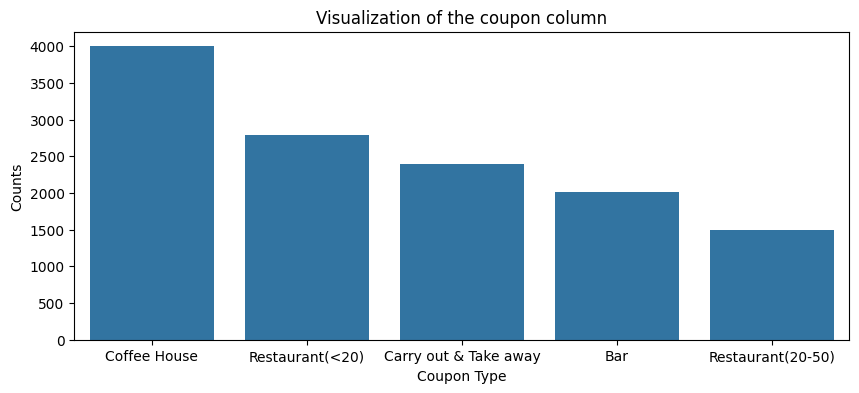

In [ ]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

plt.title('Visualization of the coupon column')
plt.xlabel('Coupon Type')
plt.ylabel('Counts')

plt.show()

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

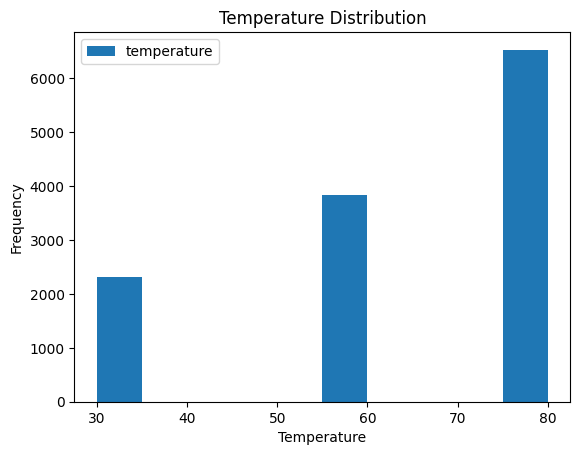

In [ ]:
data.plot(kind='hist', y='temperature')
plt.title ('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons = data[data['coupon']=="Bar"]

2. What proportion of bar coupons were accepted?


In [ ]:
Accepted_Bar_coupons_proportion = bar_coupons.query('Y ==1')['Y'].count()/len(bar_coupons['Y'])*100
Accepted_Bar_coupons_proportion
print(f'The accepted propotion of bar coupons was {Accepted_Bar_coupons_proportion} %')

The accepted propotion of bar coupons was 41.00148735746158 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
## Assume Group_A=those who went to a bar 3 or fewer times a month
group_A = bar_coupons.query(' (Bar == "never") or (Bar == "less1") or (Bar == "1~3")')

# Assume Group_B= those who went to a bar more than 3 times a month
group_B = bar_coupons.query(' (Bar == "4~8") or (Bar == "gt8") ')

#only those who were accepted
group_A = group_A.query('Y == 1')
group_B = group_B.query('Y == 1')

Total = len(group_A) + len(group_B)
print(f'The total of those who went to a bar 3 or fewer times a month = {len(group_A)} ')
print(f'The total of those who went to a bar more than 3 times a month = {len(group_B)} ')
print(f'The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more than 3 times a month = {(len(group_A) /Total) *100} %')

The total of those who went to a bar 3 or fewer times a month = 666 
The total of those who went to a bar more than 3 times a month = 153 
The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more than 3 times a month = 81.31868131868131 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
#drivers who go to a bar more than once a month
BarOnceMonthOver25 = bar_coupons.query(' (Bar == "1~3") or (Bar == "gt8") or (Bar == "4~8") ')

#drivers who go to a bar more than once a month and are over the age of 25
BarOnceMonthOver25 = BarOnceMonthOver25.query(' Y == 1 and age > "25"')

#drivers who go to a bar more than once a month
BarOnceMonthUnder25 = bar_coupons.query(' (Bar == "1~3") or (Bar == "gt8") or (Bar == "4~8") ')

#drivers who go to a bar more than once a month and are under the age of 25
BarOnceMonthUnder25 = BarOnceMonthUnder25.query(' Y == 1 and age < "25"')


In [ ]:
#total drivers who go to a bar more than once a month (Over 25 and under 25)
total = len(BarOnceMonthOver25) + len(BarOnceMonthUnder25)

#acceptance rate of drivers who go to a bar more than once a month and over the age of 25
RateOverAgeof25 =  (len(BarOnceMonthOver25) / total) * 100

#acceptance rate of drivers who go to a bar more than once a month and under the age of 25
RateunderAgeof25 =  (len(BarOnceMonthUnder25) / total) * 100

print(f'The acceptance rate of those who go to a bar more than once a month and are over the age of 25 is {RateOverAgeof25} %')
print(f'The acceptance rate of those who go to a bar more than once a month and are under the age of 25 is {RateunderAgeof25} %')
print('Yes there is a difference. A very large difference!!')

The acceptance rate of those who go to a bar more than once a month and are over the age of 25 is 72.1951219512195 %
The acceptance rate of those who go to a bar more than once a month and are under the age of 25 is 27.80487804878049 %
Yes there is a difference. A very large difference!!


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#drivers who go to bars more than once a month
morethanonce = bar_coupons.query(' (Bar == "1~3") or (Bar == "gt8") or (Bar == "4~8") ')
#and had passengers that were not kids
morethanoncezerokids = morethanonce.query(' (Y ==0 ) and (passanger !=  "Kid(s)") ')
#those who accepted and did not have kids as passengers
morethanoncezerokids1 = morethanonce.query(' (Y ==1 ) and (passanger !=  "Kid(s)") ')
#length
morethanoncezerokids_len = len(morethanoncezerokids)
#evaluated the length
morethanoncezerokids1_len = len(morethanoncezerokids1)
#total drivers
morethanoncezerokids_total = morethanoncezerokids_len + morethanoncezerokids1_len
#calculate the rate of acceptance
Rateofacceptance = (morethanoncezerokids1_len /morethanoncezerokids_total) * 100
print(f'The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {Rateofacceptance} %')
#calculate rate of non-acceptance
Rateofnonacceptance = (morethanoncezerokids_len /morethanoncezerokids_total) * 100
print(f'Those who did not accept was: {Rateofnonacceptance} %')

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32486388384754 %
Those who did not accept was: 28.67513611615245 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:

#Let's first find drivers those who went to a bar more than once a month
MoreThanOnceMonth = bar_coupons.query(' (Bar == "1~3") or (Bar == "gt8") or (Bar == "4~8") ')

#accepted passengers that were not a kid and were not  widowed
MoreThanOnceMonth_total = len(MoreThanOnceMonth.query('(passanger !=  "Kid(s)") '))
MoreThanOnceMonth = MoreThanOnceMonth.query(' (Y ==1) and (passanger !=  "Kid(s)") ')
MoreThanOnceMonth_len = len(MoreThanOnceMonth)

# Acceptance Rate calculation
MoreThanOnceMonthRate = (MoreThanOnceMonth_len / MoreThanOnceMonth_total) * 100
print(f'The acceptance rate of those who go to bars more than once a month and had passengers that were not a kid, and were not widowed was: {MoreThanOnceMonthRate} %')


The acceptance rate of those who go to bars more than once a month and had passengers that were not a kid, and were not widowed was: 71.32486388384754 %


In [ ]:
#Drivers go to bars more than once a month and are under the age of 30
MoreThanOnceMonthAge30 = bar_coupons.query(' (Bar == "1~3") or (Bar == "gt8") or (Bar == "4~8") ')

#apply filters for age
MoreThanOnceMonthAge30 = MoreThanOnceMonthAge30.query('(age == 21) or (age == 26) or (age == 15) ')
MoreThanOnceMonthAge30_total = len(MoreThanOnceMonthAge30)

#acceptance rate calculation
MoreThanOnceMonthAge30 = MoreThanOnceMonthAge30.query('Y == 1')
MoreThanOnceMonthAge30Rate = (len(MoreThanOnceMonthAge30) / MoreThanOnceMonthAge30_total  ) * 100


print(f'The acceptance rate of those who go to bars more than once a month and under the age of 30 is: {MoreThanOnceMonthAge30Rate} %')

The acceptance rate of those who go to bars more than once a month and under the age of 30 is: 72.17391304347827 %


In [ ]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
CheapResMoreThan4MonthLess50K = data.query(' (RestaurantLessThan20 =="4~8" ) or (RestaurantLessThan20 =="gt8") ')
CheapResMoreThan4MonthLess50K = CheapResMoreThan4MonthLess50K.query(' (income == "Less than $12500") or (income == "$25000 - $37499") or (income == "$37500 - $49999") or (income == "$12500 - $24999") ')
CheapResMoreThan4MonthLess50K_total = len(CheapResMoreThan4MonthLess50K)
CheapResMoreThan4MonthLess50KAccepted = CheapResMoreThan4MonthLess50K.query (' Y==1 ')
CheapResMoreThan4MonthLess50KAccepted = len(CheapResMoreThan4MonthLess50KAccepted)

#Acceptance calculation
CheapResMoreThan4MonthLess50KRate = (CheapResMoreThan4MonthLess50KAccepted / CheapResMoreThan4MonthLess50K_total) * 100
print(f'The acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50k is {CheapResMoreThan4MonthLess50KRate} %')

The acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50k is 60.07020623080298 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, one can hypothesize that drivers who accepted the bar coupons: were not widowed; are likely to go to the bar if they are passengers under 30 and do not have kids; are typically male; typically go when the weather is sunny,

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
coffee_coupons = data[data['coupon'] =="CoffeeHouse" ]

In [ ]:
coffee_coupons_proportion = coffee_coupons.query('Y ==1')['Y'].count()/len(coffee_coupons['Y'])*100
coffee_coupons_proportion
print(f'The propotion of coffee coupons accepted was: {coffee_coupons_proportion} %')

The propotion of coffee coupons accepted was: 49.92492492492492 %


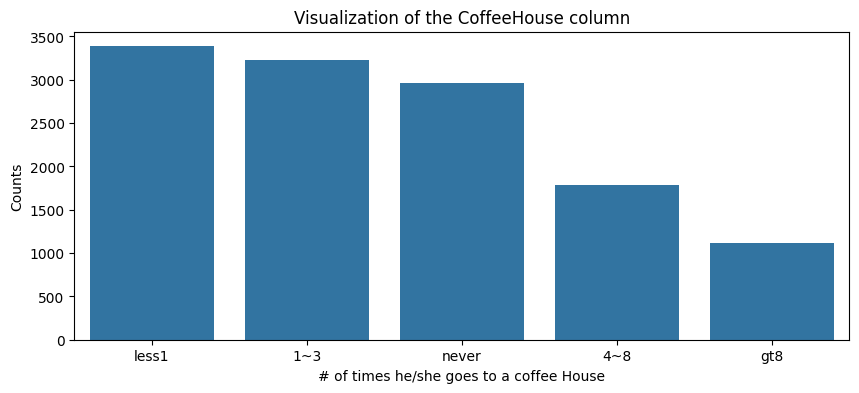

In [ ]:
coupon_counts = data['CoffeeHouse'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

plt.title('Visualization of the CoffeeHouse column')
plt.xlabel('# of times he/she goes to a coffee House')
plt.ylabel('Counts')

plt.show()

In [ ]:
#lets create a dataframe to look at where the coupon accepted and was for a coffee house group
coffee_coupons = data.query('(coupon == "Coffee House") and (Y ==1)')

NameError: name 'destination' is not defined

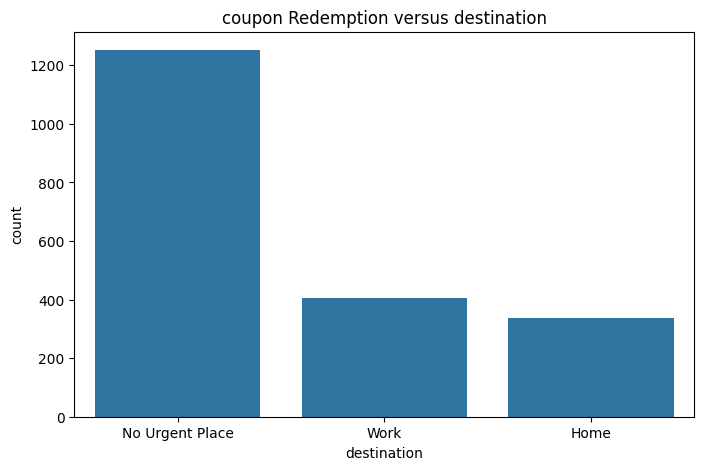

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(coffee_coupons, x="destination")
plt.title ('coupon Redemption versus destination')
plt.xlabel (destination)
plt.ylabel (counts)
plt.show

